In [1]:
path = "/gladstone/engelhardt/pelka-collaboration/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427"
setwd(path)

In [2]:
counts_good = read.csv('cellpose_cell_by_gene_goodgenes_noblanks.csv', row.names = 1)

In [8]:
dim(counts_good)
counts_good = as.matrix(counts_good)

[1] 844468    492

In [14]:
idx = which(rowSums(counts_good) == 0)

write.csv(idx,"/home/rlaursen/projects/HubID/GaussianPrior/data/cell_no_gene_count.csv")

In [2]:
metadata = read.csv('cellpose_cell_metadata.csv', row.names = 1)

In [5]:
head(metadata)

,fov,volume,center_x,center_y,min_x,min_y,max_x,max_y,barcodeCount
0,NA,26498.59,3751.498,1869.639,3705.867,1852.064,3795.907,1890.068,NA
1,NA,56901.00,4070.460,1897.063,4027.365,1852.803,4117.418,1943.802,NA
2,NA,159694.22,3868.162,1924.793,3789.673,1860.716,3953.939,2004.790,NA
3,NA,44115.62,3993.054,1901.740,3956.975,1861.465,4030.900,1944.211,NA
4,NA,68099.45,3745.070,1933.949,3703.002,1884.000,3792.867,1986.310,NA
5,NA,23206.04,4126.969,1928.588,4092.420,1894.062,4158.844,1960.451,NA


In [16]:
location = metadata[,c('center_x','center_y')]

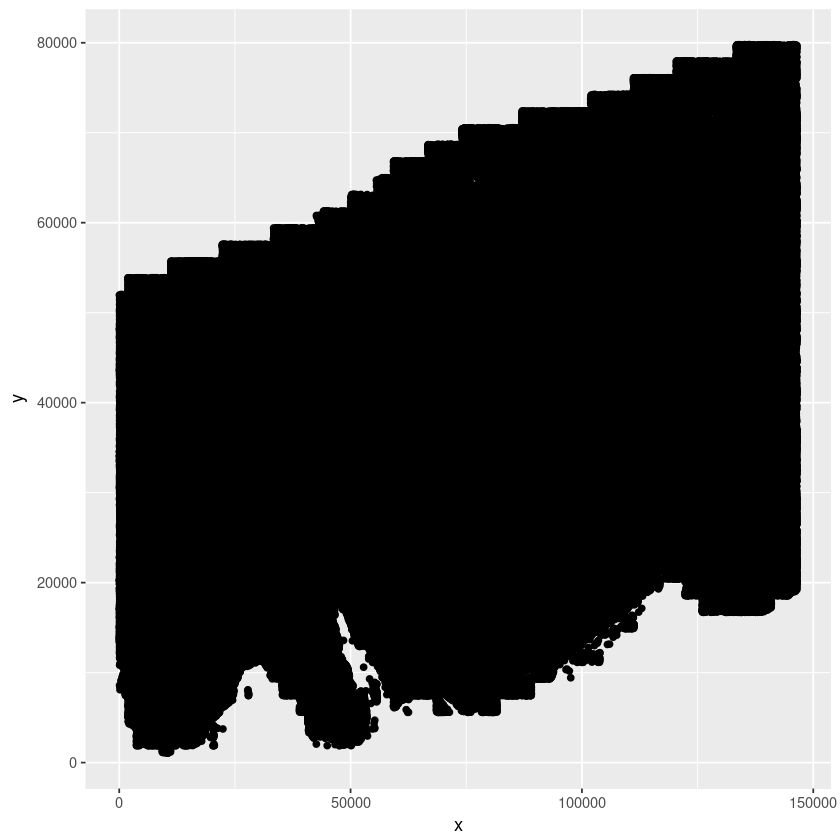

In [15]:
library(ggplot2)
df = data.frame(x = metadata[,'center_x'], y = metadata[,'center_y'])
ggplot(df, aes(x = x, y = y))+ 
    geom_point()

In [19]:
rm(list = ls())

In [8]:
con = file("detected_transcripts_micron_goodgenes.csv", "r")
trans_micron = read.csv(con, nrows = 20)


In [9]:
trans_micron

X,barcode_id,global_x,global_y,global_z,x,y,fov,gene,transcript_id
102,0,1143.682,65.79964,0,1329.6451,609.2559,0,PDK4,ENST00000005178
163,0,1111.368,90.13365,0,1030.4442,834.5709,0,PDK4,ENST00000005178
292,0,1089.453,137.15580,0,827.5248,1269.9612,0,PDK4,ENST00000005178
357,0,1088.640,149.50612,0,820.0000,1384.3159,0,PDK4,ENST00000005178
422,0,1101.750,167.85127,0,941.3859,1554.1783,0,PDK4,ENST00000005178
433,0,1107.679,170.02798,0,996.2849,1574.3331,0,PDK4,ENST00000005178
449,0,1163.870,172.25380,0,1516.5692,1594.9426,0,PDK4,ENST00000005178
464,0,1046.171,176.23787,0,426.7720,1631.8320,0,PDK4,ENST00000005178
608,0,1088.197,206.79623,0,815.8987,1914.7798,0,PDK4,ENST00000005178
711,0,1074.492,61.77600,1,689.0000,572.0000,0,PDK4,ENST00000005178


In [7]:
con = file("detected_transcripts_pixel_space_goodgenes.csv", "r")
trans_pixel = read.csv(con, nrows = 10)
trans_pixel

X,barcode_id,global_x,global_y,global_z,x,y,fov,gene,transcript_id
102,0,10589.716,609.2636,0,1329.6451,609.2559,0,PDK4,ENST00000005178
163,0,10290.514,834.5813,0,1030.4442,834.5709,0,PDK4,ENST00000005178
292,0,10087.594,1269.9771,0,827.5248,1269.9612,0,PDK4,ENST00000005178
357,0,10080.068,1384.3333,0,820.0000,1384.3159,0,PDK4,ENST00000005178
422,0,10201.456,1554.1979,0,941.3859,1554.1783,0,PDK4,ENST00000005178
433,0,10256.355,1574.3529,0,996.2849,1574.3331,0,PDK4,ENST00000005178
449,0,10776.643,1594.9626,0,1516.5692,1594.9426,0,PDK4,ENST00000005178
464,0,9686.838,1631.8526,0,426.7720,1631.8320,0,PDK4,ENST00000005178
608,0,10075.968,1914.8040,0,815.8987,1914.7798,0,PDK4,ENST00000005178
711,0,9949.069,572.0072,1,689.0000,572.0000,0,PDK4,ENST00000005178
